In [ ]:
beginning = "2019-01-01"
end = "2024-01-23"
code = "AAPL"

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Load data using Yahoo Finance API
data = yf.download(code, start=beginning, end=end)

#Select only necessary columns
data = data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

#Remove missing values from the data
data = data.dropna()

#Convert data into a NumPy array
X = np.array(data)

#Display the structure of the data
print(X.shape)
print(data.head())
print(data.tail())

[*********************100%%**********************]  1 of 1 completed

(1272, 6)
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2019-01-02  38.722500  39.712502  38.557499  39.480000  37.893330  148158800
2019-01-03  35.994999  36.430000  35.500000  35.547501  34.118877  365248800
2019-01-04  36.132500  37.137501  35.950001  37.064999  35.575378  234428400
2019-01-07  37.174999  37.207500  36.474998  36.982498  35.496208  219111200
2019-01-08  37.389999  37.955002  37.130001  37.687500  36.172867  164101200
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-01-16  182.160004  184.259995  180.929993  183.630005  183.630005   
2024-01-17  181.270004  182.929993  180.300003  182.679993  182.679993   
2024-01-18  186.089996  189.139999  185.830002  188.630005  188.630005   
2024-01-19  189.330002  191.949997  188.820007  191.559998  191.559998   
2024-01

In [ ]:
# Major Indices

start_date = beginning
end_date = end

#Load data for S&P 500 Index from 2020-01-01 to 2022-02-28
sp500 = yf.Ticker("^GSPC")
sp500_data = sp500.history(start=start_date, end=end_date)

#Load data for Nasdaq Composite Index
nasdaq = yf.Ticker("^IXIC")
nasdaq_data = nasdaq.history(start=start_date, end=end_date)

#Load data for Dow Jones Industrial Average
dowjones = yf.Ticker("^DJI")
dowjones_data = dowjones.history(start=start_date, end=end_date)

In [ ]:
# Adjusting initial values of indices to the stock price using corresponding multipliers
k_sp = sp500_data.iloc[0,3] / data.iloc[0,3]
k_n = nasdaq_data.iloc[0,3] / data.iloc[0,3]
k_dj = dowjones_data.iloc[0,3] / data.iloc[0,3]

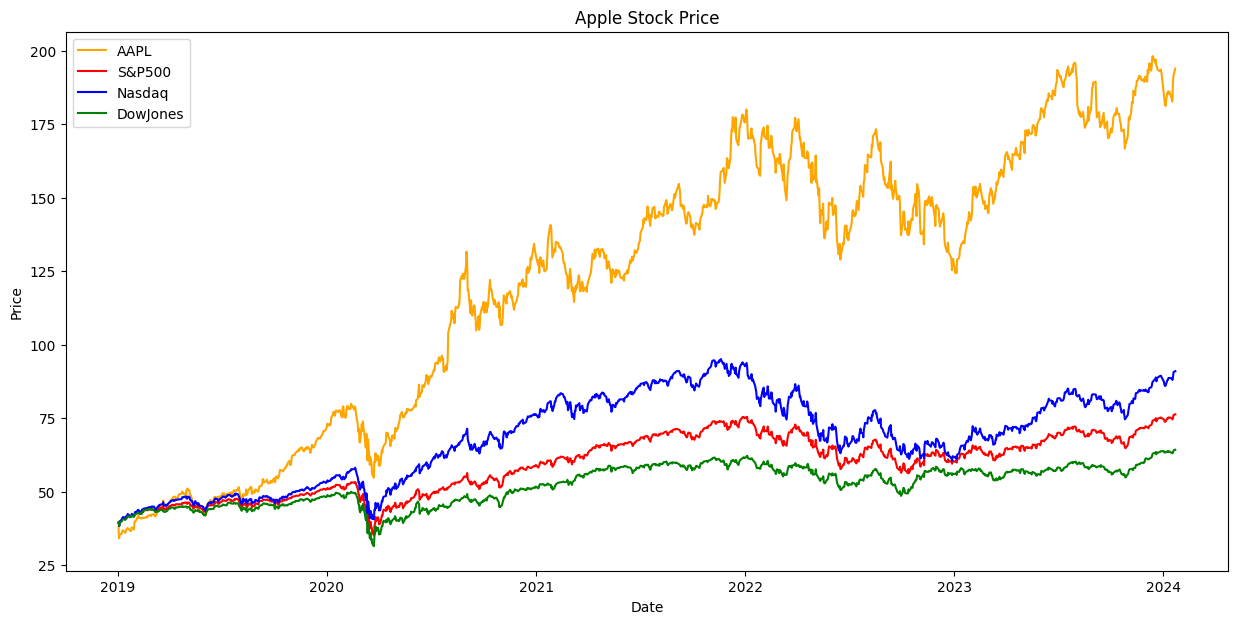

In [ ]:
#Plotting simple historical price charts

plt.rcParams["figure.figsize"] = (15,7)
plt.plot(data['Adj Close'],color='orange')
plt.plot(sp500_data['Close']/k_sp,color='red')
plt.plot(nasdaq_data['Close']/k_n,color='blue')
plt.plot(dowjones_data['Close']/k_dj,color='green')
plt.title('Apple Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend([code,'S&P500','Nasdaq','DowJones'])
plt.show()

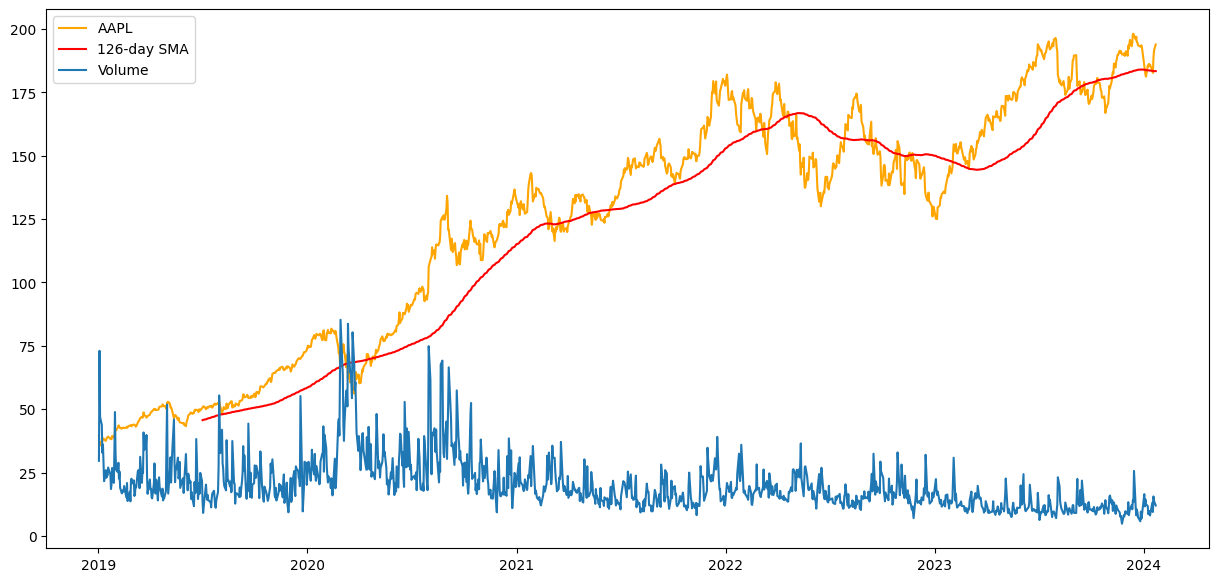

In [ ]:
#Calculate the simple moving average for a period of LKD=... days
LKD = 126
sma50 = data["Close"].rolling(window=LKD).mean()

#Plot the graph
plt.plot(data.index, data["Close"],color='orange')
plt.plot(sma50.index, sma50,color='red')
plt.plot(data.index, data["Volume"]/5_000_000)
plt.legend([code, f"{LKD}-day SMA",'Volume'])
plt.show()

In [ ]:
#!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29413 sha256=70b2372d9c8b064c1efa4813f742145edefe6800c60bdaf97890d0e3782978d9
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [ ]:
import ta

# Calculate ATR
data['ATR'] = ta.volatility.average_true_range(data['High'], data['Low'], data['Close'], window=60)

# Print data
print(data.tail())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-01-16  182.160004  184.259995  180.929993  183.630005  183.630005   
2024-01-17  181.270004  182.929993  180.300003  182.679993  182.679993   
2024-01-18  186.089996  189.139999  185.830002  188.630005  188.630005   
2024-01-19  189.330002  191.949997  188.820007  191.559998  191.559998   
2024-01-22  192.300003  195.330002  192.259995  193.889999  193.889999   

              Volume       ATR  
Date                            
2024-01-16  65603000  3.081912  
2024-01-17  47317400  3.086047  
2024-01-18  78005800  3.142280  
2024-01-19  68741000  3.145241  
2024-01-22  60133900  3.155654  


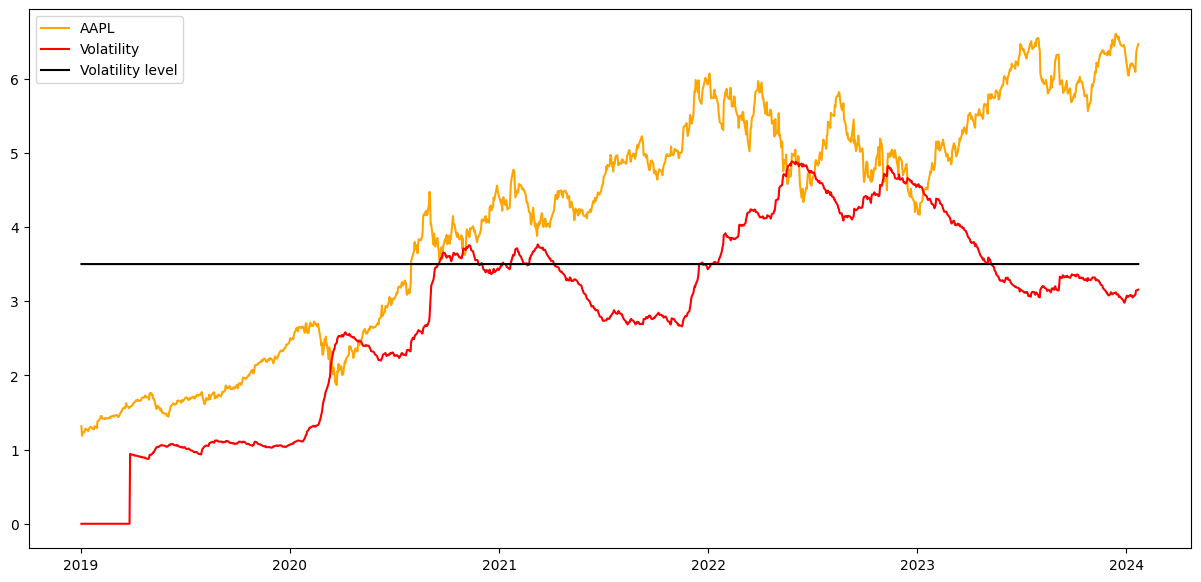

In [ ]:
# Plot the graph

plt.plot(data.index, data['Close']/30,color='orange')
plt.plot(data.index, data['ATR'],color='red')
plt.plot(data.index, data['Close']/data['Close']*3.5,color='black')
plt.legend([code,'Volatility','Volatility level'])
plt.show()

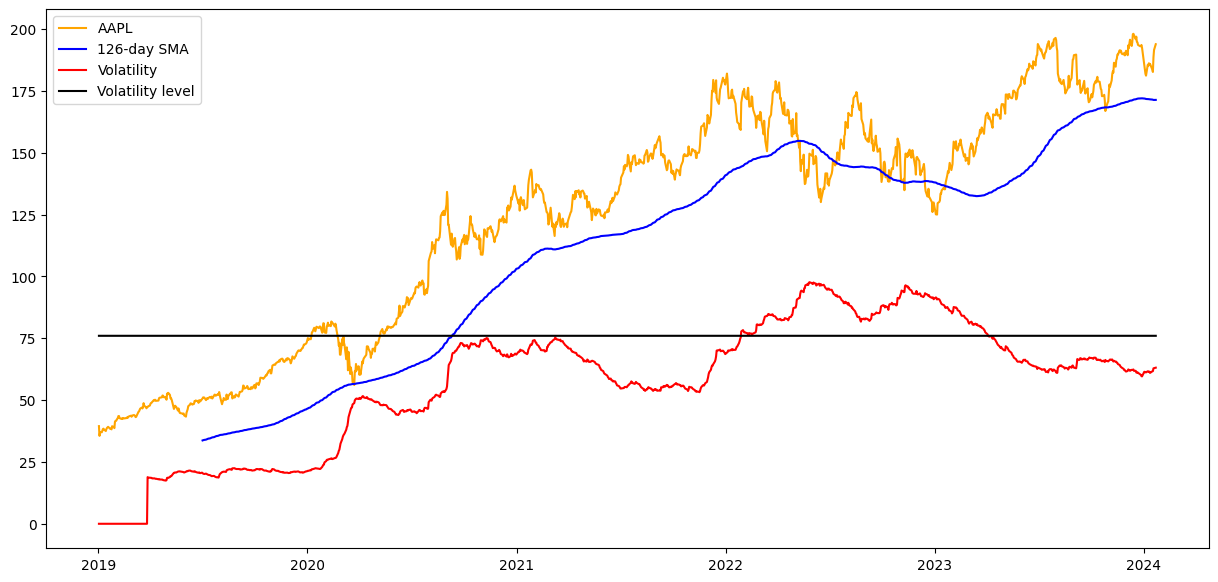

In [ ]:
#Plot the graph
factor = 20
volatility_factor = 3.8
sma_shift = -12

plt.plot(data.index, data["Close"],color='orange')
plt.plot(sma50.index, sma50+sma_shift,color='blue')
plt.plot(data.index, data['ATR']*factor,color='red')
plt.plot(data.index, data['Close']/data['Close']*volatility_factor*factor,color='black')
plt.legend([code, f"{LKD}-day SMA",'Volatility','Volatility level'])
plt.show()